# Estudo sobre infecções de sífilis no Brasil
Um estudo por gênero e diferentes regiões

In [ ]:
#Importando bibliotecas utilizadas

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importando base de dados e fazendo os devidos ajustes

data = pd.read_excel('/content/gdrive/MyDrive/Trabalho inferência/base de dados(novo).xlsx')
data['Ano'] = data['Ano'].astype(int)
data = data.dropna()

#Criação da coluna de casos totais de sífilis no Brasil e em suas regiões
data['Total'] = data['Homens'] + data['Mulheres']
data
tab = pd.DataFrame(columns = data.columns)

#Tabela auxiliar para calcular a taxa de infecção por 100 mil habitantes no Brasil
for i in ['Homens', 'Mulheres', 'Ano']:
  tab[i] = data.groupby(by = ['Ano']).sum().loc[:, ['Homens', 'Mulheres']].reset_index()[i]

for i in data['Ano'].drop_duplicates():
  tab.loc[:, 'Infecções por 100 mil habitantes'][tab['Ano'] == i] = \
  data[data['Ano']==i]['Total'].sum()/(data[data['Ano']==i]['Total']/data[data['Ano']==i]['Infecções por 100 mil habitantes']).sum()

tab['Total'] = tab['Homens'] + tab['Mulheres']
tab['Região'] = 'Brasil'

#União da tabela auxiliar com a tabela original
data = pd.concat([data, tab])
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Homens,Mulheres,Infecções por 100 mil habitantes,Ano,Região,Total
0,296,219,3.2,2011,Norte,515
1,469,387,5.2,2012,Norte,856
2,787,693,8.7,2013,Norte,1480
3,968,772,10.1,2014,Norte,1740
4,1258,928,12.5,2015,Norte,2186
5,2349,1732,23.0,2016,Norte,4081
6,3572,2541,34.1,2017,Norte,6113
7,5781,4188,54.8,2018,Norte,9969
8,6606,4160,58.4,2019,Norte,10766
9,5259,2976,44.1,2020,Norte,8235


In [ ]:
data[data['Região'] == 'Brasil']

,Homens,Mulheres,Infecções por 100 mil habitantes,Ano,Região,Total
0,10987,7222,9.457412,2011,Brasil,18209
1,17038,10878,14.434531,2012,Brasil,27916
2,23443,15873,19.536046,2013,Brasil,39316
3,30479,20073,24.966201,2014,Brasil,50552
4,41751,27538,33.908868,2015,Brasil,69289
5,54007,37038,44.166995,2016,Brasil,91045
6,71802,50301,58.803293,2017,Brasil,122103
7,94906,64225,76.354624,2018,Brasil,159131
8,93334,62485,74.22781,2019,Brasil,155819
9,72471,42733,54.473126,2020,Brasil,115204


In [ ]:
#Manipulação da tabela inicial para o formato adequado para fazer plotagens com a biblioteca Plotly
aux = ['Homens']*data['Homens'].shape[0] + ['Mulheres']*data['Mulheres'].shape[0] + ['Total']*data['Total'].shape[0]
data2 = pd.DataFrame({'Casos': pd.concat([data['Homens'], data['Mulheres'], data['Total']]), 'Gênero': aux, 'Ano': (data['Ano'].to_list())*3, \
                      'Região': (data['Região'].to_list())*3})
data2

,Casos,Gênero,Ano,Região
0,296,Homens,2011,Norte
1,469,Homens,2012,Norte
2,787,Homens,2013,Norte
3,968,Homens,2014,Norte
4,1258,Homens,2015,Norte
...,...,...,...,...
5,91045,Total,2016,Brasil
6,122103,Total,2017,Brasil
7,159131,Total,2018,Brasil
8,155819,Total,2019,Brasil


## Gráficos não interativos

###Boxplots

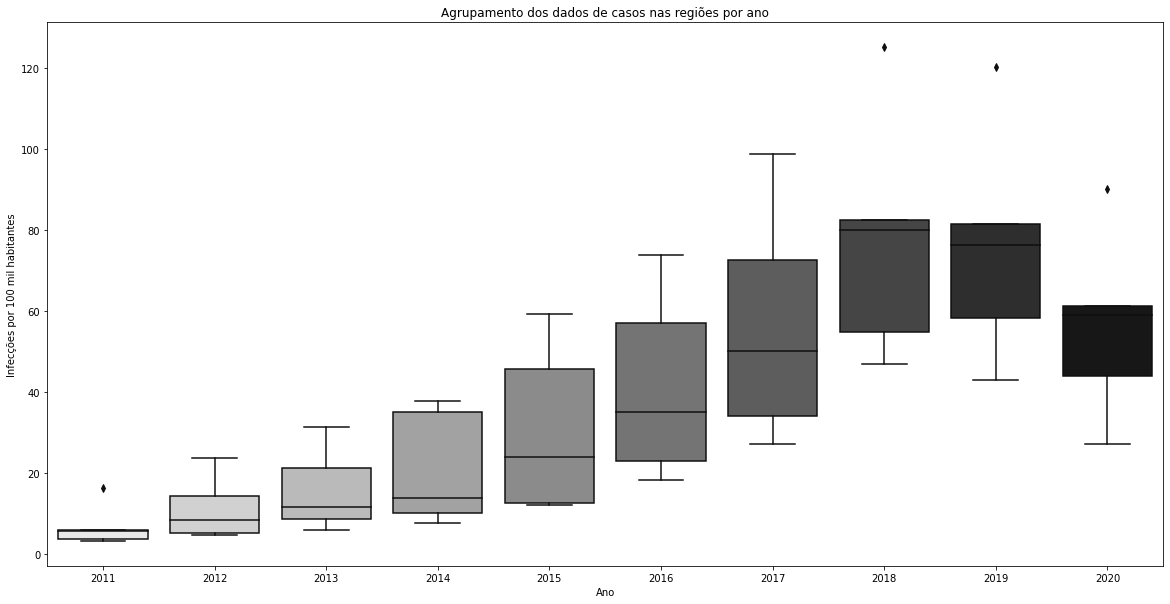

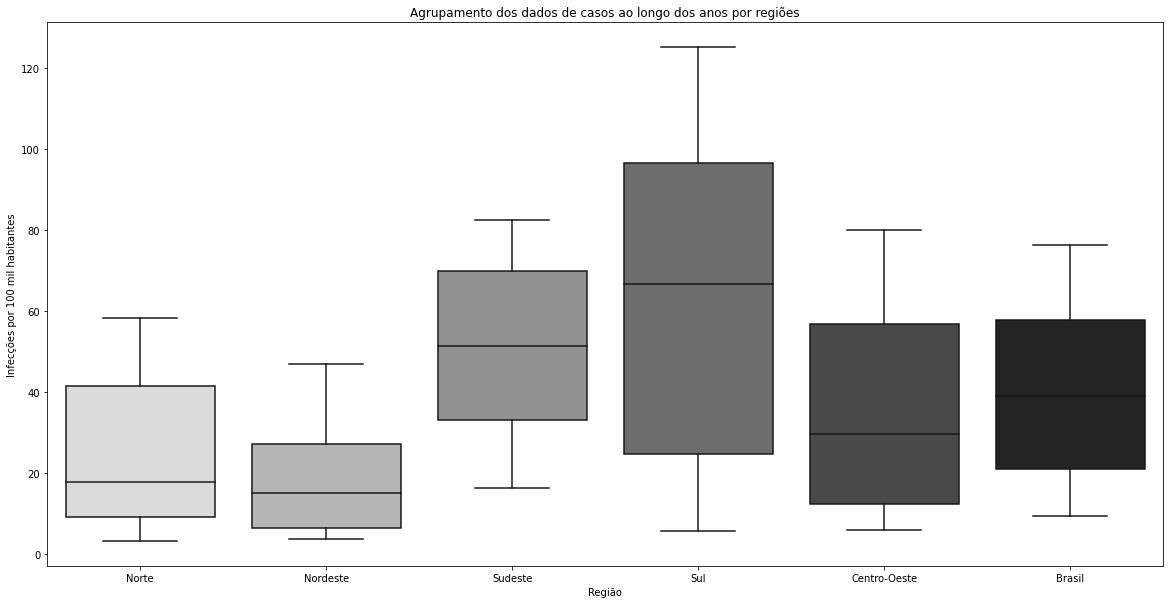

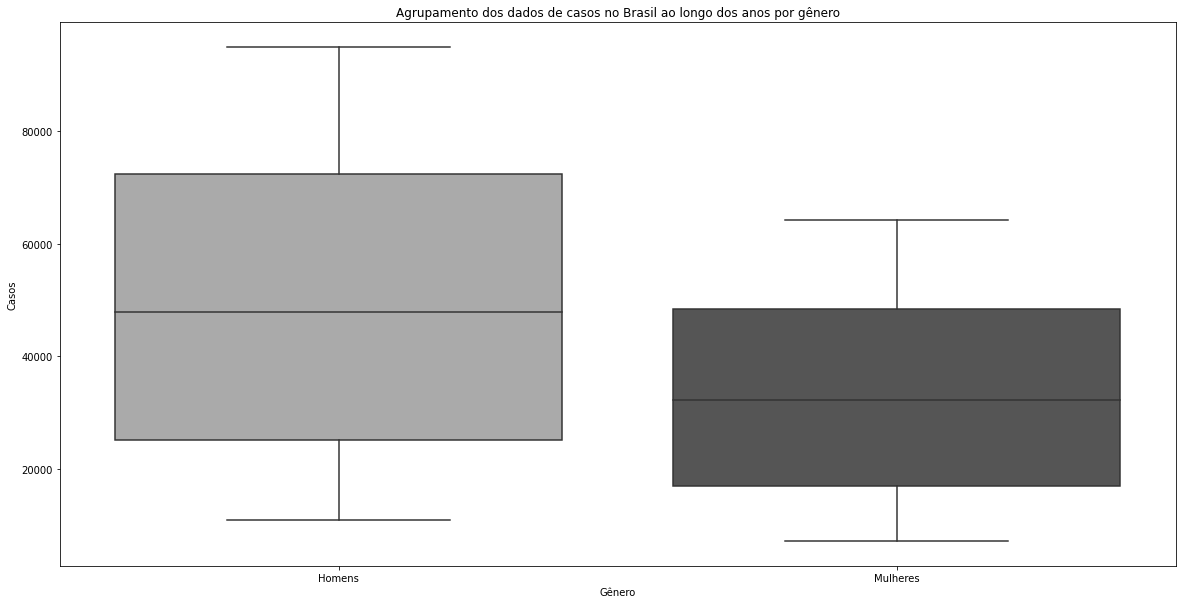

In [ ]:
data['Ano'] = data['Ano'].astype(str)

plt.subplots(figsize = (20, 10))
plt.title('Agrupamento dos dados de casos nas regiões por ano')
sns.boxplot(data = data[data['Região'] != 'Brasil'], y = 'Infecções por 100 mil habitantes', x = 'Ano', palette = 'binary')

plt.subplots(figsize = (20, 10))
plt.title('Agrupamento dos dados de casos ao longo dos anos por regiões')
sns.boxplot(data = data, y = 'Infecções por 100 mil habitantes', x = 'Região', palette = 'binary')

plt.subplots(figsize = (20, 10))
plt.title('Agrupamento dos dados de casos no Brasil ao longo dos anos por gênero')
sns.boxplot(data = data2[(data2['Região'] == 'Brasil') & (data2['Gênero'] != 'Total')], y = 'Casos', x = 'Gênero', palette = 'binary')

### Barras

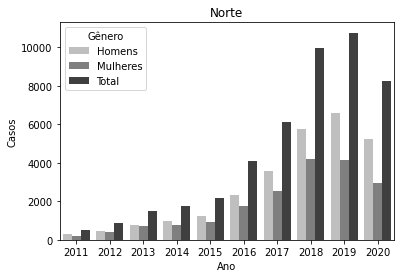

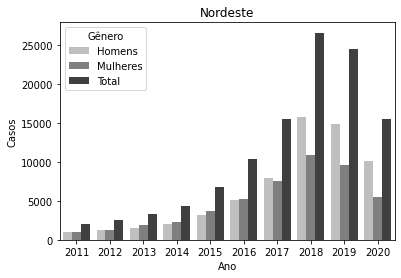

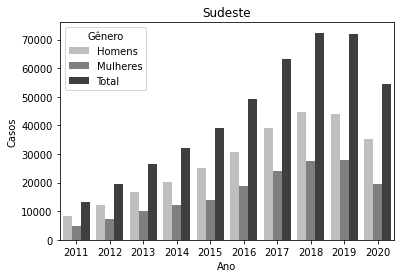

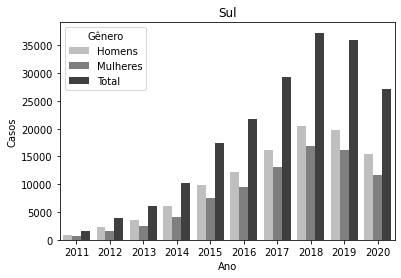

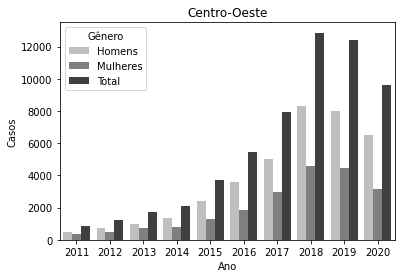

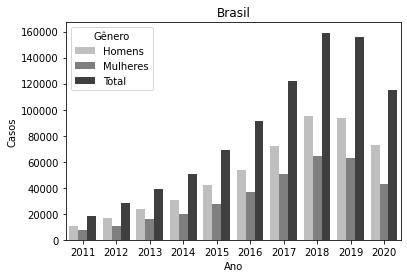

In [ ]:

for i in data2['Região'].drop_duplicates():
  plt.subplots()
  plt.title(i)
  sns.barplot(data = data2[data2['Região'] == i], x = 'Ano', y = 'Casos', hue = 'Gênero', palette = 'binary')
  #plt.legend(labels=['Homens', 'Mulheres', 'Total'])

###Dispersão

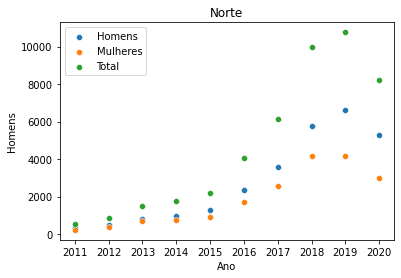

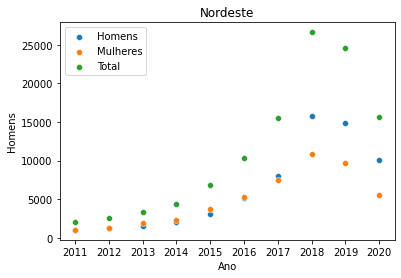

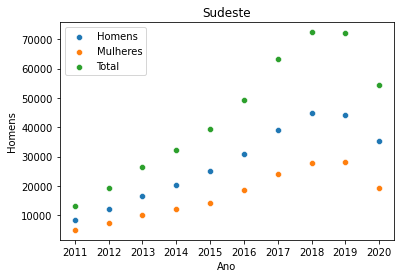

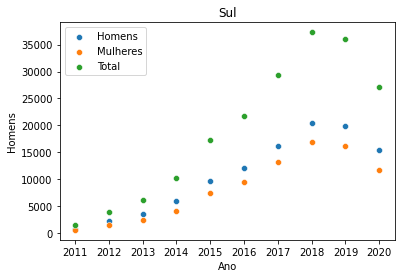

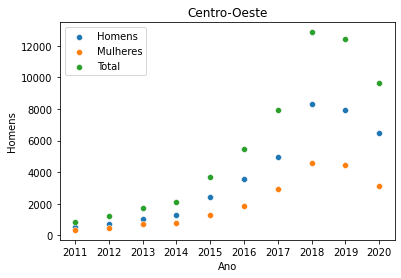

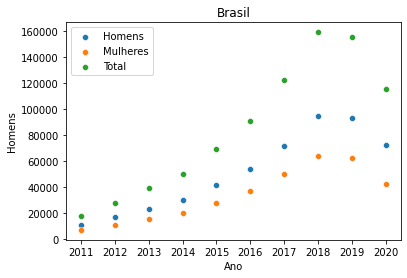

In [ ]:
for i in data['Região'].drop_duplicates():
  plt.subplots()
  plt.title(i)
  sns.scatterplot(x = data[data['Região'] == i]['Ano'], y = data[data['Região'] == i]['Homens'])
  sns.scatterplot(x = data[data['Região'] == i]['Ano'], y = data[data['Região'] == i]['Mulheres'])
  sns.scatterplot(x = data[data['Região'] == i]['Ano'], y = data[data['Região'] == i]['Total'])
  plt.legend(labels=['Homens', 'Mulheres', 'Total'])


## Gráficos interativos

###Boxplots

In [ ]:
data['Ano'] = data['Ano'].astype(str)
fig = px.box(data[data['Região'] != 'Brasil'],  x = 'Ano', y = 'Infecções por 100 mil habitantes', title = 'Agrupamento dos dados das regiões por ano', points = 'all')
fig.update_traces(quartilemethod = 'inclusive')
fig.show()

fig = px.box(data, y = 'Infecções por 100 mil habitantes', x = 'Região', title = 'Agrupamento dos dados dos anos por região')
fig.update_traces(quartilemethod = 'inclusive')
fig.show()

fig = px.box(data2[(data2['Região'] == 'Brasil') & (data2['Gênero'] != 'Total')], y = 'Casos', x = 'Gênero', title = 'Agrupamento dos dados de casos no Brasil ao longo dos anos por gênero')
fig.update_traces(quartilemethod = 'inclusive')
fig.show()

###Barras

In [ ]:
data2['Ano'] = data2['Ano'].astype(str)

for i in data2['Região'].drop_duplicates():
  fig = px.bar(data2[data2['Região'] == i], x = 'Ano', y = 'Casos', color = 'Gênero', title = i, barmode='group')
  fig.show()

###Dispersão

In [ ]:
for i in data2['Região'].drop_duplicates():
  fig = px.scatter(data2[data2['Região'] == i], x = 'Ano', y = 'Casos', color = 'Gênero', title = i)
  fig.show()

## Tabelas descritivas

In [ ]:
for i in data['Ano'].drop_duplicates():
  print(i)
  print(data[(data['Região'] != 'Brasil') & (data['Ano'] == i)].describe())
  print('\n')

print('\n\n\n')

for i in data['Região'].drop_duplicates():
  print(i)
  print(data[data['Região'] == i].describe())
  print('\n')


2011
            Homens     Mulheres         Total
count     5.000000     5.000000      5.000000
mean   2197.400000  1444.400000   3641.800000
std    3382.882395  2000.438402   5379.991887
min     296.000000   219.000000    515.000000
25%     509.000000   350.000000    859.000000
50%     923.000000   663.000000   1586.000000
75%    1034.000000  1009.000000   2043.000000
max    8225.000000  4981.000000  13206.000000


2012
             Homens     Mulheres         Total
count      5.000000     5.000000      5.000000
mean    3407.600000  2175.600000   5583.200000
std     4961.807312  2840.528877   7799.473841
min      469.000000   387.000000    856.000000
25%      749.000000   480.000000   1229.000000
50%     1309.000000  1204.000000   2513.000000
75%     2318.000000  1635.000000   3953.000000
max    12193.000000  7172.000000  19365.000000


2013
             Homens     Mulheres       Total
count      5.000000     5.000000      5.0000
mean    4688.600000  3174.600000   7863.2000
std     6

##Testes de hipótese com nível de significância $\alpha = 5\%$

### Testes de normalidade (Shapiro-Wilk)

In [ ]:
ano = []
p_valor = []
for i in data['Ano'].drop_duplicates():
  ano.append(i)
  p_valor.append(st.shapiro(data[(data['Ano'] == i) & (data['Região'] != 'Brasil')]['Infecções por 100 mil habitantes'])[1])

normalidade_anos = pd.DataFrame({'Ano': ano, 'p-Valor': p_valor})

normalidade_anos

,Ano,p-Valor
0,2011,0.030499
1,2012,0.280799
2,2013,0.456537
3,2014,0.113662
4,2015,0.310523
5,2016,0.545196
6,2017,0.653881
7,2018,0.517474
8,2019,0.783094
9,2020,0.894966


In [ ]:
regiao = []
p_valor = []
for i in data['Região'].drop_duplicates():
  regiao.append(i)
  p_valor.append(st.shapiro(data[data['Região'] == i]['Infecções por 100 mil habitantes'])[1])

normalidade_regiao = pd.DataFrame({'Região': regiao, 'p-Valor': p_valor})

normalidade_regiao

,Região,p-Valor
0,Norte,0.118146
1,Nordeste,0.111035
2,Sudeste,0.599796
3,Sul,0.445534
4,Centro-Oeste,0.163378
5,Brasil,0.471106


In [ ]:
genero = []
p_valor = []
for i in data2['Gênero'].drop_duplicates():
  genero.append(i)
  p_valor.append(st.shapiro(data2[(data2['Gênero'] == i) & (data2['Região'] == 'Brasil')]['Casos'])[1])

normalidade_genero = pd.DataFrame({'Gênero': genero, 'p-Valor': p_valor})

normalidade_genero

,Gênero,p-Valor
0,Homens,0.382931
1,Mulheres,0.466885
2,Total,0.429321


### Testes de homocedasticidade/variâncias iguais (Levene)


In [ ]:
aux1 = []
for i in data['Ano'].drop_duplicates():
  aux1.append(data[(data['Ano'] == i) & (data['Região'] != 'Brasil')]['Infecções por 100 mil habitantes'])
st.levene(aux1[0], aux1[1], aux1[2], aux1[3], aux1[4], aux1[5], aux1[6], aux1[7], aux1[8], aux1[9])


LeveneResult(statistic=1.2414361074103302, pvalue=0.29831747607943454)

In [ ]:
regiao = []
p_valor = []
for i in data[data['Região'] != 'Brasil']['Região'].drop_duplicates():
  regiao.append(i + ' e Brasil')
  p_valor.append(st.levene(data[data['Região'] == i]['Infecções por 100 mil habitantes'], data[data['Região'] == 'Brasil']['Infecções por 100 mil habitantes'])[1])

homocedasticidade_regiao = pd.DataFrame({'Comparação': regiao, 'p-Valor': p_valor})

homocedasticidade_regiao

,Comparação,p-Valor
0,Norte e Brasil,0.573753
1,Nordeste e Brasil,0.115380
2,Sudeste e Brasil,0.912464
3,Sul e Brasil,0.034339
4,Centro-Oeste e Brasil,0.612050


In [ ]:
aux3 = []
aux3.append(data2[(data2['Gênero'] == 'Homens') & (data2['Região'] == 'Brasil')]['Casos'])
aux3.append(data2[(data2['Gênero'] == 'Mulheres') & (data2['Região'] == 'Brasil')]['Casos'])
st.levene(aux3[0], aux3[1])

LeveneResult(statistic=2.5776127755052585, pvalue=0.12578574326070427)

### Testes de comparação entre médias

In [ ]:
st.f_oneway(aux1[1], aux1[2], aux1[3], aux1[4], aux1[5], aux1[6], aux1[7], aux1[8], aux1[9])

F_onewayResult(statistic=6.20745509929237, pvalue=4.868602800583941e-05)

In [ ]:
regiao = []
p_valor = []
for i in data[(data['Região'] != 'Brasil') & (data['Região'] != 'Sul')]['Região'].drop_duplicates():
  regiao.append(i + ' e Brasil')
  p_valor.append(st.ttest_ind(data[data['Região'] == i]['Infecções por 100 mil habitantes'], data[data['Região'] == 'Brasil']['Infecções por 100 mil habitantes'])[1])

regiao.append('Sul e Brasil')
p_valor.append(st.ttest_ind(data[data['Região'] == 'Sul']['Infecções por 100 mil habitantes'],\
                            data[data['Região'] == 'Brasil']['Infecções por 100 mil habitantes'], equal_var = False)[1])

teste_t_regiao = pd.DataFrame({'Comparação': regiao, 'p-Valor': p_valor})

teste_t_regiao

,Comparação,p-Valor
0,Norte e Brasil,0.141634
1,Nordeste e Brasil,0.031990
2,Sudeste e Brasil,0.363435
3,Centro-Oeste e Brasil,0.704527
4,Sul e Brasil,0.163319


In [ ]:
st.ttest_ind(aux3[0], aux3[1])

Ttest_indResult(statistic=1.4561717939601382, pvalue=0.16256696651619756)